# Importing libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns
import plotly.express as px

In [2]:
print(os.environ['CONDA_DEFAULT_ENV'])

Walmart_Forecast


In [3]:
df_stores = pd.read_csv("Data/stores.csv")
df_features = pd.read_csv("Data/features.csv")
df_sales = pd.read_csv("Data/train.csv")

In [4]:
print(df_stores.columns)
print(df_features.columns)
print(df_sales.columns)

Index(['Store', 'Type', 'Size'], dtype='object')
Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')
Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')


In [5]:
df_sales_stores = df_sales.merge(df_stores, on = "Store")
df = df_sales_stores.merge(df_features, on = ["Store", "Date", "IsHoliday"])
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421566,45,94,2012-10-26,5203.31,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421567,45,95,2012-10-26,56017.47,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667
421568,45,97,2012-10-26,6817.48,False,B,118221,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667


In [13]:
ProfileReport(df, minimal = True)

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
df.isna().sum()
# We can see no NA values, except in Markdown columns 
# It may show us that there were no promotions that week??

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

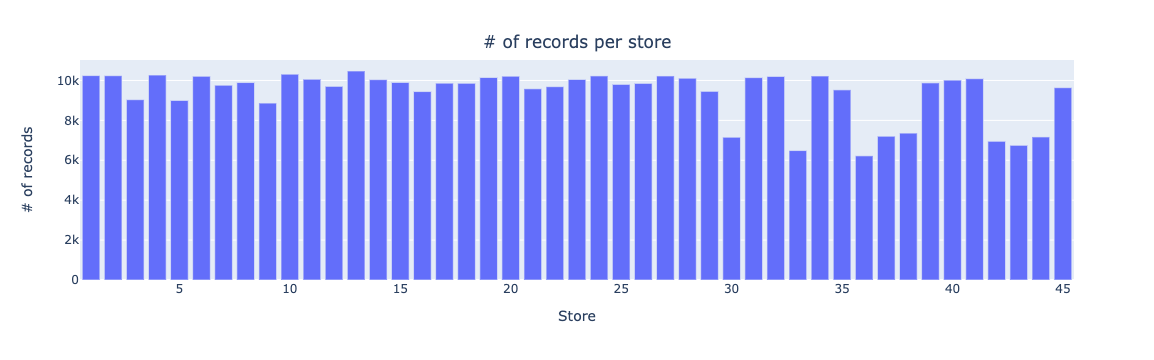

In [17]:
fig = px.bar(df, x = df.Store.value_counts().index,y = df.Store.value_counts().values,
            labels={
                     "x": "Store",
                     "y": "# of records"
                 })

fig.update_layout(title={'text' : "# of records per store",
                         'y':0.9,
                         'x':0.5,
                         'xanchor' : 'center',
                         'yanchor' : 'top'})
fig.show()

We can see that all the stores are well represented within our data

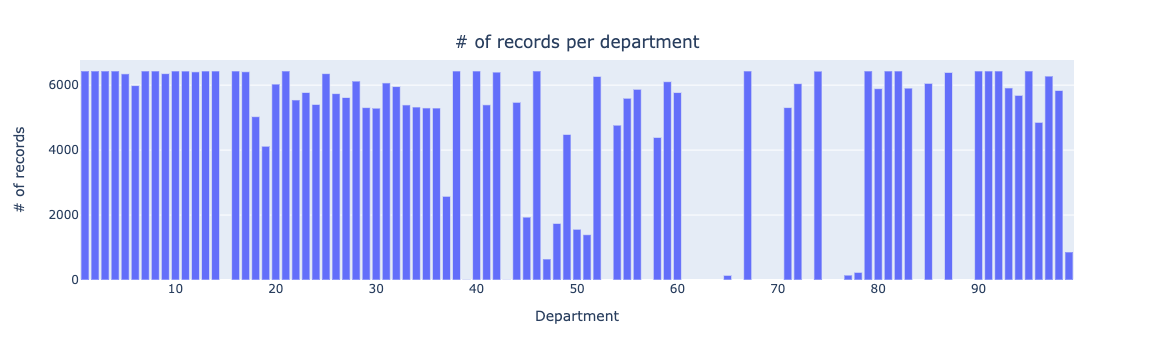

In [42]:
fig = px.bar(df, x = df.Dept.value_counts().index,y = df.Dept.value_counts().values,
            labels={
                     "x": "Department",
                     "y": "# of records"
                 })

fig.update_layout(title={'text' : "# of records per department",
                         'y':0.9,
                         'x':0.5,
                         'xanchor' : 'center',
                         'yanchor' : 'top'})
fig.show()

In [27]:
df.Dept.value_counts().sort_values().head(15)

43      12
39      16
65     143
77     150
78     235
47     646
99     862
51    1394
50    1562
48    1742
45    1936
37    2577
19    4119
58    4390
49    4482
Name: Dept, dtype: int64

In [29]:
df.Dept.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56,
       58, 59, 60, 67, 71, 72, 74, 79, 80, 81, 82, 83, 85, 87, 90, 91, 92,
       93, 94, 95, 97, 98, 78, 96, 99, 77, 39, 50, 43, 65])

In [30]:
len(df.Dept.unique())

81

We have 81 different departments in the data.  
Most departments are well represented, while 7 of them have <1000 observations, and 2 of them 12 and 16 observations each.  
Might be worth looking into later?

In [34]:
df.Date = pd.to_datetime(df.Date)

In [36]:
df.Date.value_counts()

2011-12-23    3027
2011-11-25    3021
2011-12-16    3013
2011-12-09    3010
2012-02-17    3007
              ... 
2010-07-09    2903
2010-07-16    2901
2010-08-20    2901
2010-08-27    2898
2010-08-13    2896
Name: Date, Length: 143, dtype: int64

In [39]:
print(df.Date.min())
print(df.Date.max())

2010-02-05 00:00:00
2012-10-26 00:00:00


We can see that we have data ranging from February 5th, 2010 all the way to October 26, 2012.  
We have about 3000 observations for each week

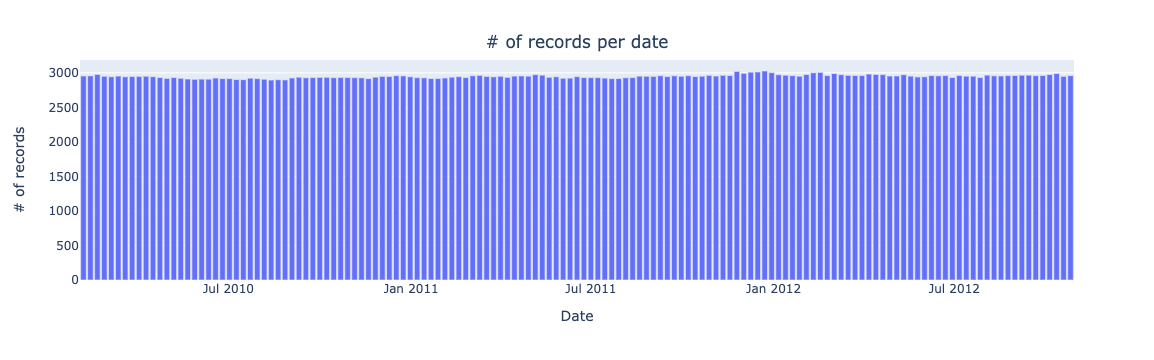

In [41]:
fig = px.bar(df, x = df.Date.value_counts().index,y = df.Date.value_counts().values,
            labels={
                     "x": "Date",
                     "y": "# of records"
                 })

fig.update_layout(title={'text' : "# of records per date",
                         'y':0.9,
                         'x':0.5,
                         'xanchor' : 'center',
                         'yanchor' : 'top'})
fig.show()